<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be some of the challenges you might encounter.

Also, this project aims to increase your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for multi-class classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data*
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df1 =   pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin-1")

In [3]:
df2 = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [4]:
df1.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [5]:
df2.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3      10043                           

In [6]:
df2.rename(columns={"SubjectId": "subjectid"}, inplace=True)

In [7]:
# check if there is difference between columns names
set(df1.columns.tolist()) == set(df2.columns.tolist())

True

In [8]:
df2.head(1)

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   

   interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  kneeheightsitting  lateralfemoralepicondyleheight  lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  palmlength  poplitealheight  radialestylionlength  shouldercircumference  shoulderelbowlength  shoulderlength  sittingheight  sleevelengthspinewrist  sleeveoutseam  span  stature  suprasternaleheight  tenthribheight  thighcircumference  thighclearance  thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  waistcircumference  waistdepth  waistfrontlengthsitting  waistheightomphalion  weightkg  wristcircumference  wristheight  Gender      Date Installation     Component          Branch PrimaryMOS SubjectsBirthLocation  SubjectNumericRace Ethnicity  DODRace  Age  Heightin  Weightlbs WritingPreference  
0                    645         363          399                   435                496                             447                      55                      404                  118                335                    368                           1268         113              362                   235                   1062                  327             148            803                     809            513  1647     1560                 1280            1013                 622             174            736           430               110                  844                           1488              406           295                 850         217                      345                   942       657                 152          756  Female  5-Oct-10    Fort Hood  Regular Army  Combat Support        92Y               Germany                   2       NaN        2   26        61        142        Right hand

In [9]:
print(df1.shape)
print(df2.shape)

(4082, 108)
(1986, 108)


In [10]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [11]:
df.shape

(6068, 108)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [13]:
df.info(max_cols=110)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [14]:
df.isnull().sum().any()

True

In [15]:
df.duplicated().sum()

0

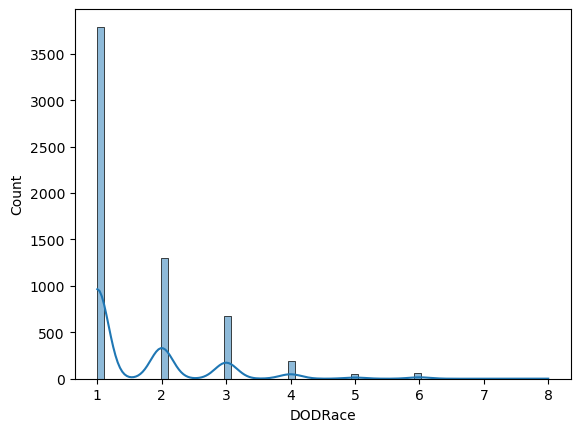

In [16]:
sns.histplot(df.DODRace , kde=True);

In [17]:
drop_list= ['Ethnicity','subjectid','Date', "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin","SubjectNumericRace"]
df.drop(drop_list, axis=1, inplace=True)

In [18]:
df.isnull().sum().any()

False

In [19]:
df.shape

# Our feature count dropped from 108 to 99.

(6068, 98)

In [20]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")



Gender has 2 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


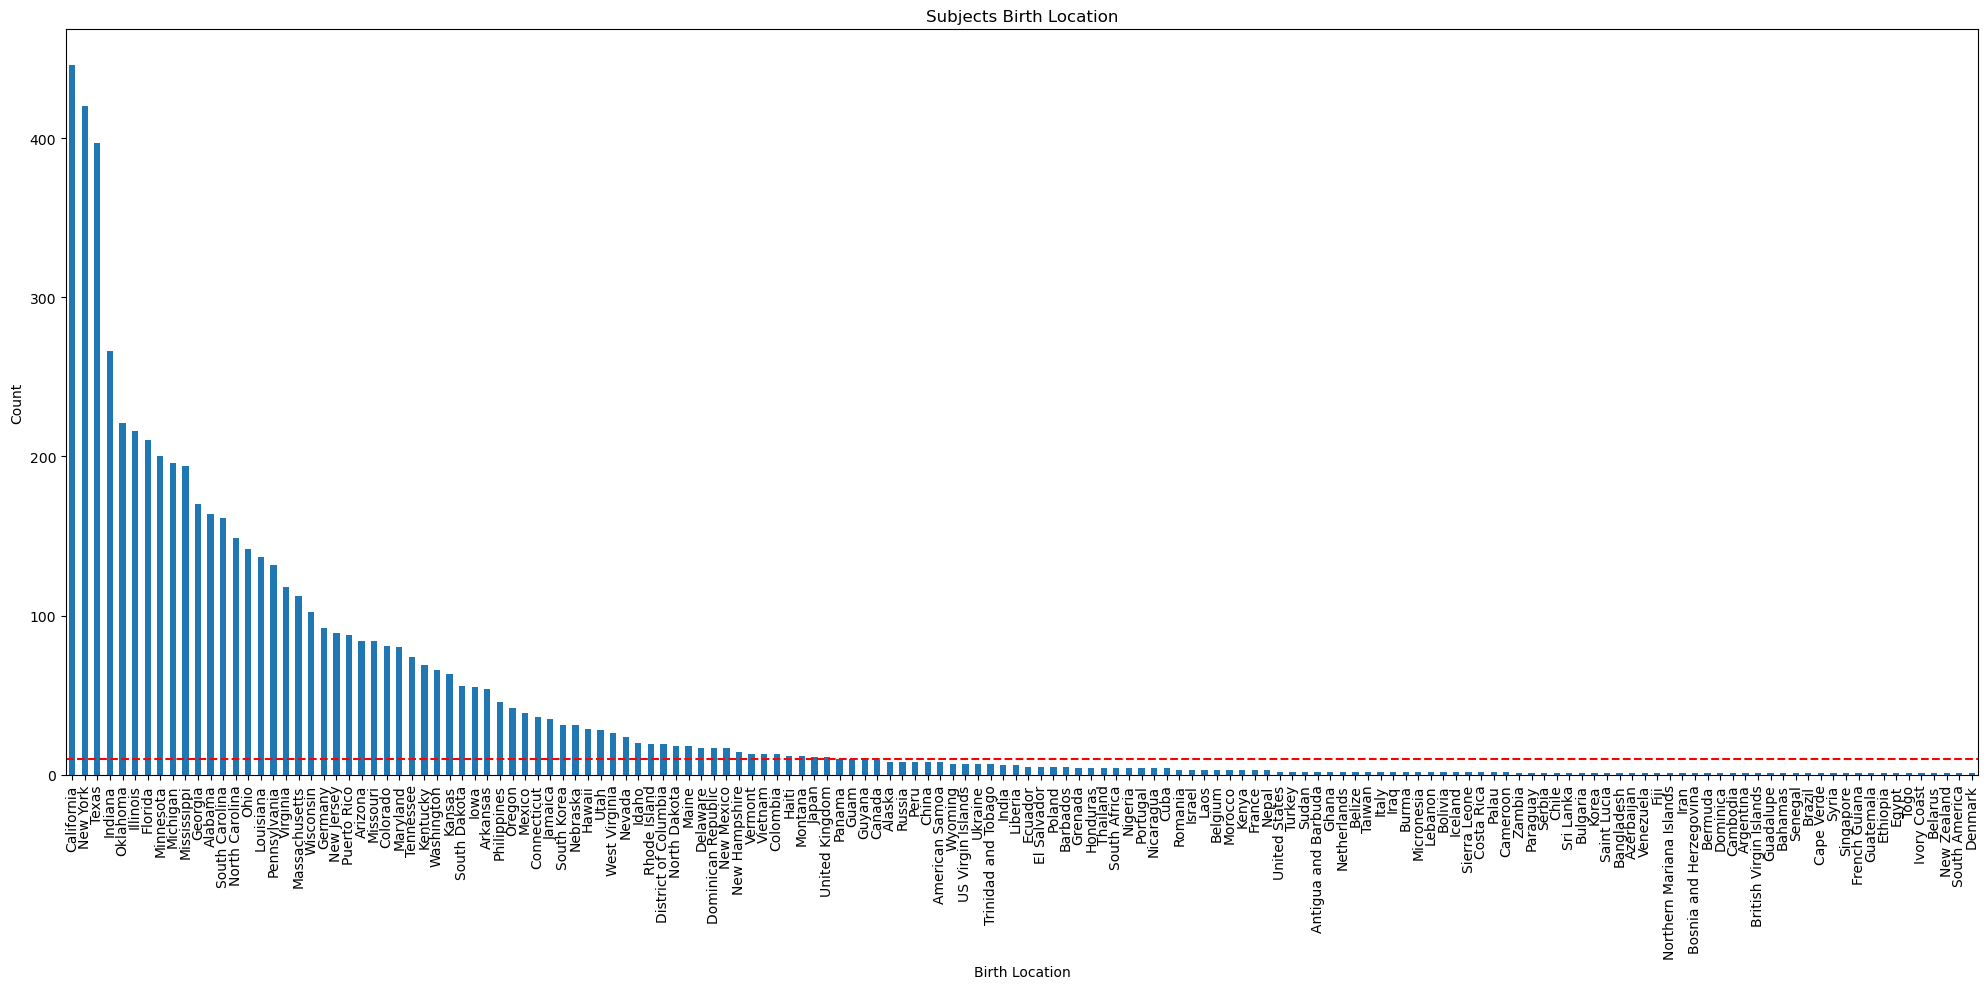

In [21]:
df.SubjectsBirthLocation.value_counts().plot(kind="bar", figsize=(20,10))
plt.title("Subjects Birth Location")
plt.xlabel("Birth Location")
plt.ylabel("Count")
plt.axhline(10, color='r', linestyle='--')  
plt.tight_layout();

In [22]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8])

In [23]:
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)



In [24]:
df.shape

(6068, 98)

In [25]:
df.DODRace.value_counts()

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

In [26]:
df3 = df[df["DODRace"].isin(["White", "Black", "Hispanic"])]
df3

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

In [27]:
df3.reset_index(drop=True, inplace=True)

In [28]:
df3

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

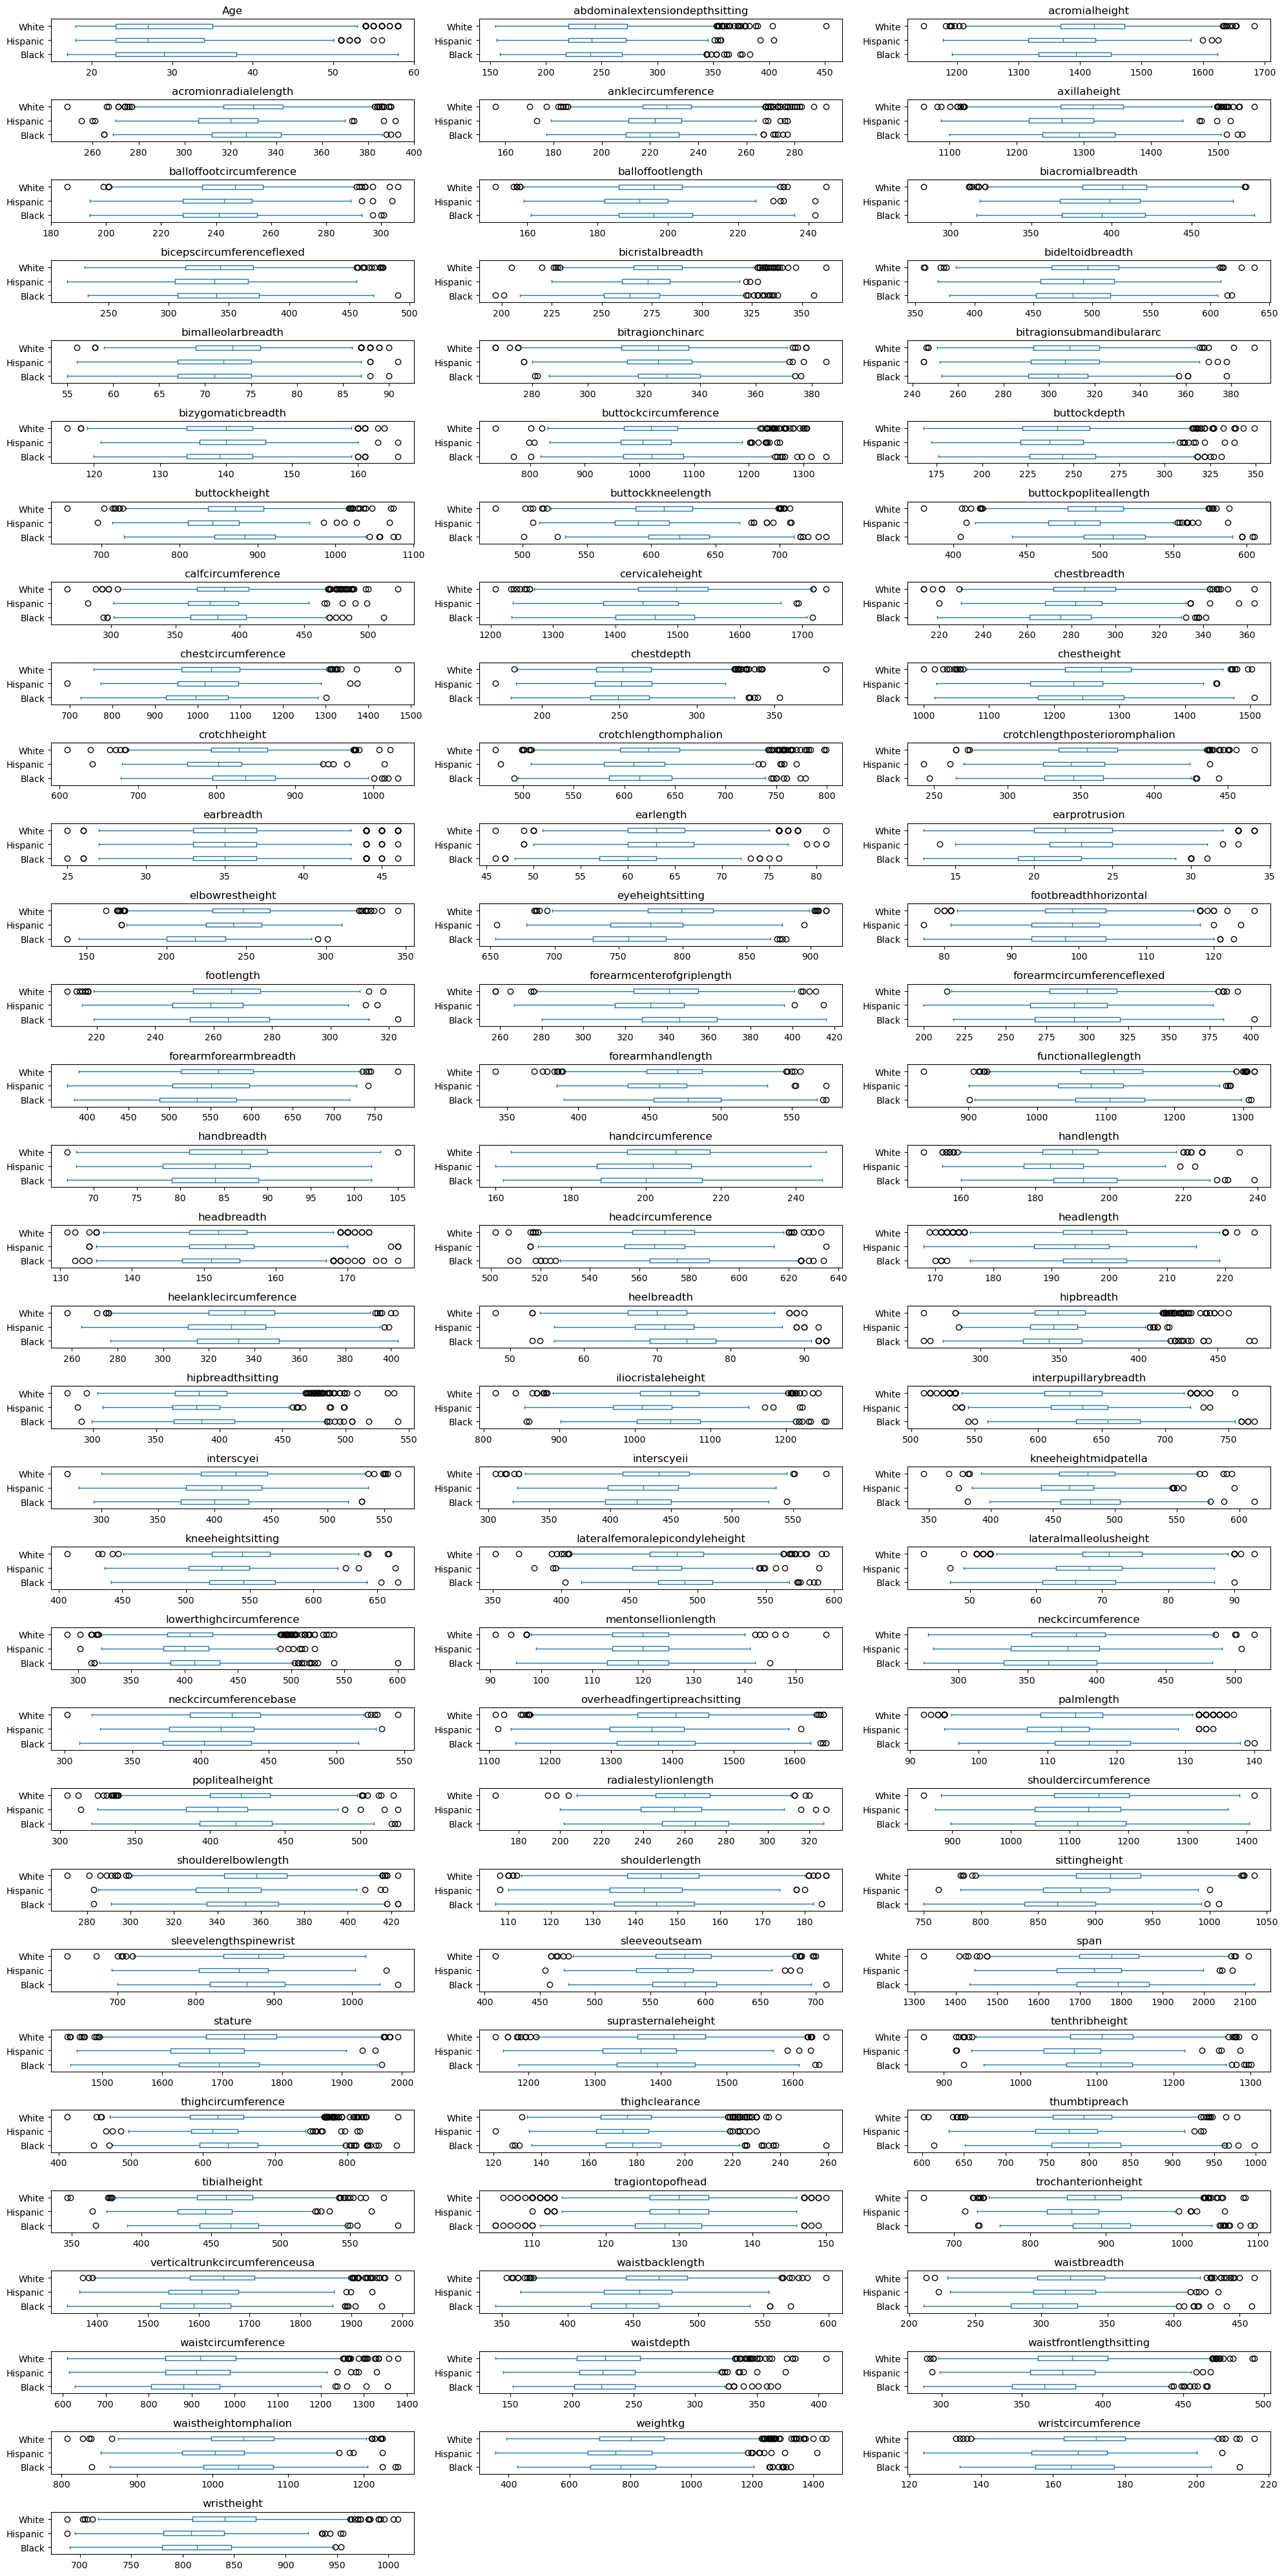

In [29]:
df3.plot(by ='DODRace', kind="box", subplots=True, layout=(32, 3), figsize=(20, 40), vert=False, sharex=False, sharey=False)
plt.tight_layout();


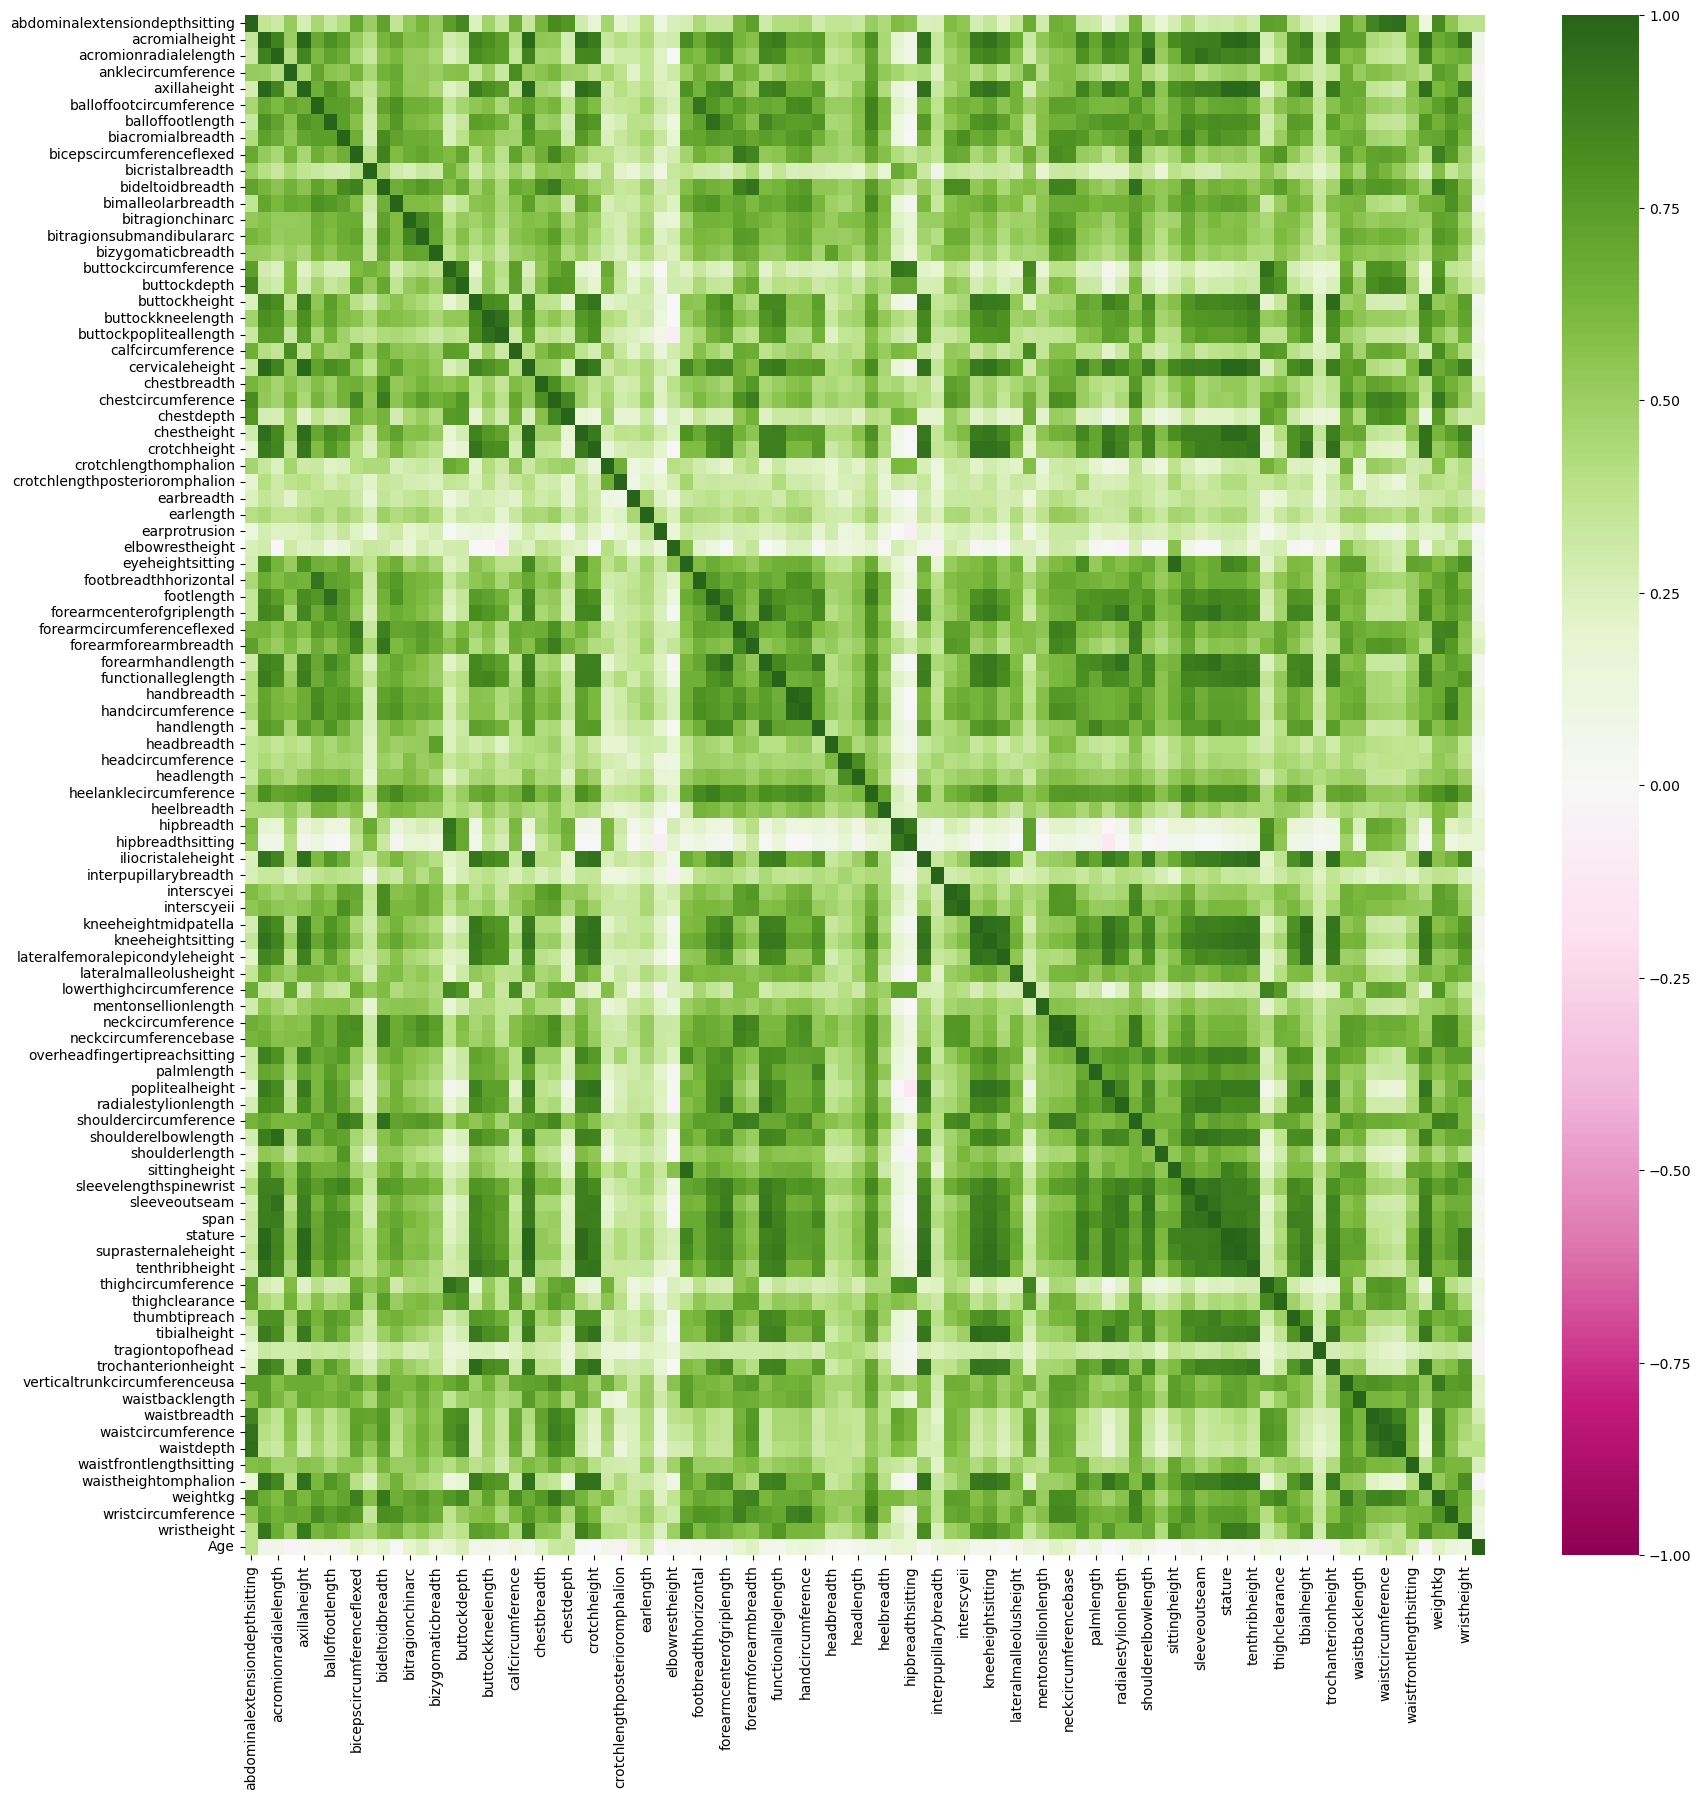

In [30]:
plt.figure(figsize=(20, 20))
sns.heatmap(df3.corr(numeric_only=True), vmin=-1, vmax=1, cmap="PiYG");



# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [31]:
X = df3.drop(columns=["DODRace"])
y = df3.DODRace

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

In [33]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [158]:
scaler =MinMaxScaler

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to check if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity check of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [35]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [36]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [37]:
from sklearn.pipeline import Pipeline

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

pipe_log_model = Pipeline(steps=operations)

In [38]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [39]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [40]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.490303
train_precision_Hispanic    0.533167
test_recall_Hispanic        0.773333
train_recall_Hispanic       0.838958
test_f1_Hispanic            0.599420
train_f1_Hispanic           0.651966
dtype: float64

### Logistic Model GridsearchCV

In [41]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [42]:
param_grid = {
    "log__C": [0.5, 1],
    "log__penalty": ["l1", "l2"],
    "log__solver": ["liblinear", "lbfgs"],
}

In [43]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [44]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [45]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [46]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.773333
mean_train_score    0.838958
Name: 7, dtype: object

In [47]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



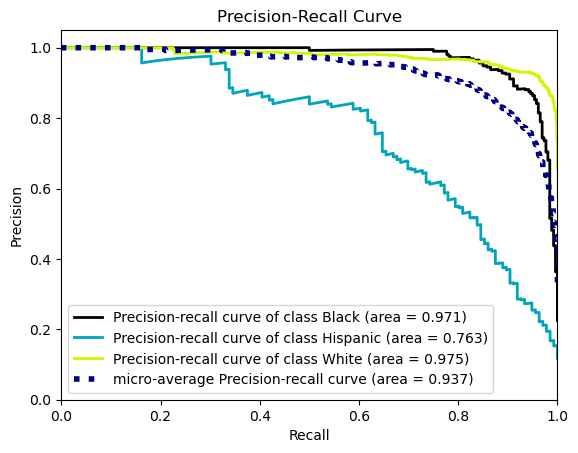

In [48]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [49]:

from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values  

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# Returns 0 black, 1 hispanic, 2 white scores.
# We got hispanic scores by specifying 1 here.

0.76285390011445

In [50]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


## Logistic Regression solver "liblenear" for small dataset

In [51]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

pipe_log_model_libl = Pipeline(steps=operations)



In [52]:
pipe_log_model_libl.fit(X_train, y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[245   4  11]
 [  5  96  35]
 [ 18  34 706]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       260
    Hispanic       0.72      0.71      0.71       136
       White       0.94      0.93      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 975   19   44]
 [  29  386  128]
 [  43  146 2845]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94      1038
    Hispanic       0.70      0.71      0.71       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [53]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.660595
train_precision_Hispanic    0.700724
test_recall_Hispanic        0.635118
train_recall_Hispanic       0.702682
test_f1_Hispanic            0.646215
train_f1_Hispanic           0.701684
dtype: float64

## 2. SVC

### Vanilla SVC model

In [54]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

pipe_svc_model = Pipeline(steps=operations_svc)

In [55]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [56]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.450808
train_precision_Hispanic    0.495061
test_recall_Hispanic        0.760404
train_recall_Hispanic       0.835275
test_f1_Hispanic            0.565226
train_f1_Hispanic           0.621644
dtype: float64

###  SVC Model GridsearchCV

In [57]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [58]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [59]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [60]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [61]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.760404
mean_train_score    0.835275
Name: 3, dtype: object

In [62]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



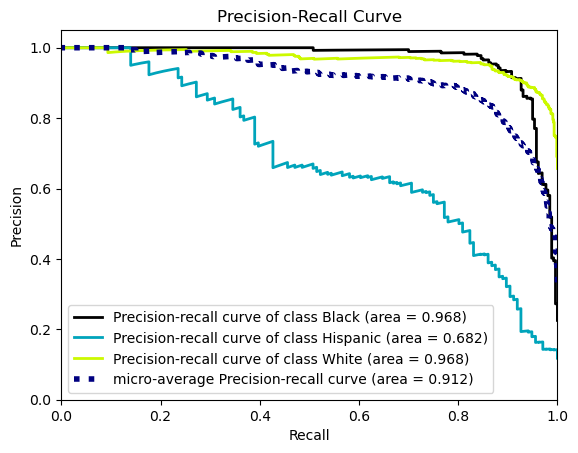

In [63]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [64]:
decision_function

array([[-0.2564319 ,  1.00050884,  2.25640477],
       [ 0.90085897, -0.23090633,  2.24269653],
       [-0.20606989,  2.17429357,  1.11451401],
       ...,
       [ 1.05232344, -0.18051267,  2.16624964],
       [-0.15450499,  2.11881204,  1.07890713],
       [-0.25949425,  1.17576515,  2.23526051]])

In [65]:
model.classes_

array(['Black', 'Hispanic', 'White'], dtype=object)

In [66]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6822405823886313

In [67]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [68]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [69]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

### Vanilla RF Model

In [70]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [71]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[192   0  68]
 [  9   6 121]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.91      0.74      0.82       260
    Hispanic       0.75      0.04      0.08       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.82      0.59      0.59      1154
weighted avg       0.82      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [72]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.727143
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.025807
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.049442
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [73]:
param_grid = {
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],
    
}

In [74]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [75]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [76]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [77]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [78]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.609582
mean_train_score    0.645955
Name: 0, dtype: object

In [79]:
rf_grid_model.best_score_

0.6095820591233435

In [80]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[174  50  36]
 [ 16  76  44]
 [ 91 244 423]]
              precision    recall  f1-score   support

       Black       0.62      0.67      0.64       260
    Hispanic       0.21      0.56      0.30       136
       White       0.84      0.56      0.67       758

    accuracy                           0.58      1154
   macro avg       0.56      0.60      0.54      1154
weighted avg       0.72      0.58      0.62      1154


Train_Set
[[ 702  204  132]
 [  45  346  152]
 [ 246 1105 1683]]
              precision    recall  f1-score   support

       Black       0.71      0.68      0.69      1038
    Hispanic       0.21      0.64      0.31       543
       White       0.86      0.55      0.67      3034

    accuracy                           0.59      4615
   macro avg       0.59      0.62      0.56      4615
weighted avg       0.75      0.59      0.64      4615



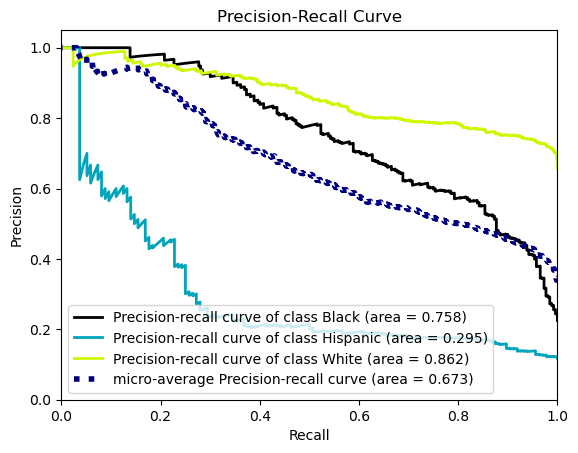

In [81]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [82]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.29502831039228344

In [83]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [84]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})



pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [85]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[227   4  29]
 [  8  51  77]
 [ 16  10 732]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       260
           1       0.78      0.38      0.51       136
           2       0.87      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.74      0.77      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [86]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [87]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

weights  label
893   2.833026      1
196   0.507031      2
3821  0.507031      2
3206  0.507031      2
4500  1.482017      0

In [88]:
comp.groupby("label").value_counts()



label  weights 
0      1.482017    1038
1      2.833026     543
2      0.507031    3034
Name: count, dtype: int64

In [89]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [90]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[231   2  27]
 [ 11  64  61]
 [ 21  20 717]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       260
           1       0.74      0.47      0.58       136
           2       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [91]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}



In [92]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

/opt/homebrew/Caskroom/miniconda/base/envs/project-ml-2/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/homebrew/Caskroom/miniconda/base/envs/project-ml-2/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/homebrew/Caskroom/miniconda/base/envs/project-ml-2/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/homebrew/Caskroom/miniconda/base/envs/project-ml-2/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDty

test_precision_Hispanic     0.694862
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.427234
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.528032
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [93]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [94]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [95]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

/opt/homebrew/Caskroom/miniconda/base/envs/project-ml-2/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/homebrew/Caskroom/miniconda/base/envs/project-ml-2/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/homebrew/Caskroom/miniconda/base/envs/project-ml-2/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/homebrew/Caskroom/miniconda/base/envs/project-ml-2/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDty

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [96]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [97]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.8}

In [98]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.565443
mean_train_score    0.648256
Name: 14, dtype: object

In [99]:
xgb_grid_model.best_score_

0.5654434250764526

In [100]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[200  37  23]
 [ 17  79  40]
 [ 97 177 484]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       260
           1       0.27      0.58      0.37       136
           2       0.88      0.64      0.74       758

    accuracy                           0.66      1154
   macro avg       0.60      0.66      0.60      1154
weighted avg       0.76      0.66      0.69      1154


Train_Set
[[ 800  149   89]
 [  64  348  131]
 [ 274  699 2061]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      1038
           1       0.29      0.64      0.40       543
           2       0.90      0.68      0.78      3034

    accuracy                           0.70      4615
   macro avg       0.63      0.70      0.64      4615
weighted avg       0.79      0.70      0.72      4615



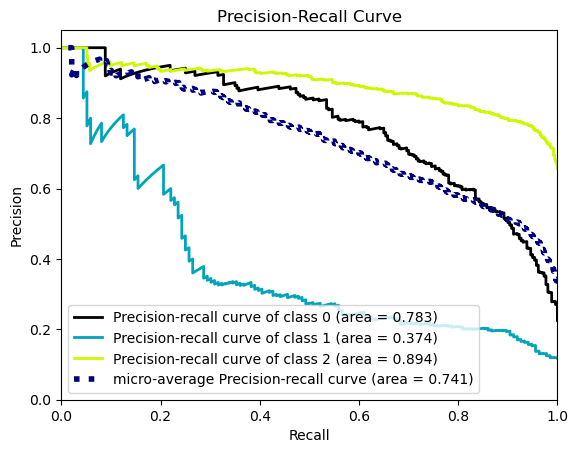

In [101]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=40,
            subsample=1,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [102]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [103]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.37438513518700206

In [104]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

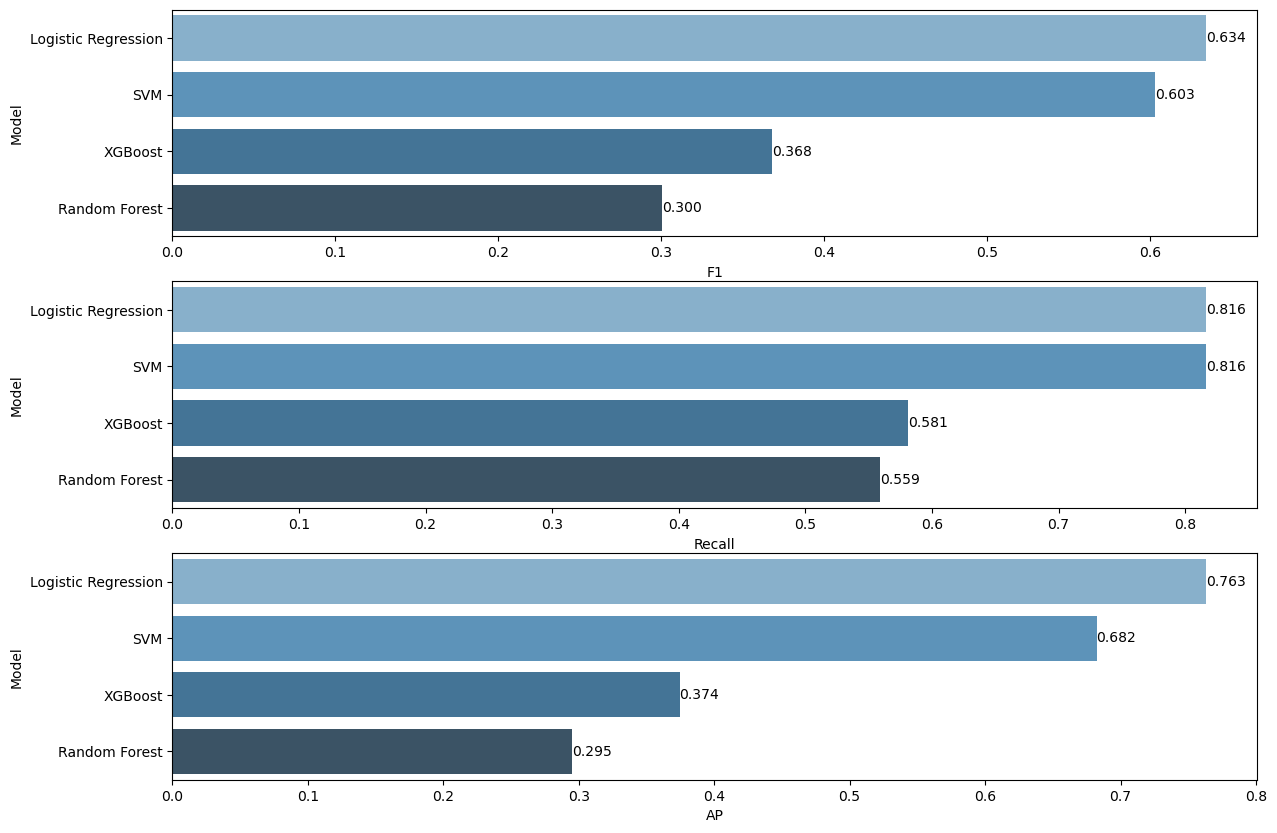

In [105]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

---
---

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [106]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [107]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [108]:
X[X.Gender == "Male"].describe()


abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference   chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion   earbreadth    earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal   footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference   handlength  headbreadth  headcircumference   headlength  heelanklecircumference  heelbreadth   hipbreadth  hipbreadthsitting  iliocristaleheight  \
count                     3899.000000     3899.000000            3899.000000         3899.000000   3899.000000               3899.00000       3899.000000        3899.000000                3899.000000       3899.000000       3899.000000         3899.000000       3899.000000                3899.000000         3899.000000           3899.000000   3899.000000    3899.000000        3899.000000             3899.000000        3899.000000      3899.000000   3899.000000         3899.000000  3899.000000  3899.000000   3899.000000            3899.000000                     3899.000000  3899.000000  3899.000000    3899.000000      3899.000000       3899.000000            3899.000000  3899.000000                3899.000000                 3899.000000            3899.000000        3899.000000          3899.000000  3899.000000        3899.000000  3899.000000  3899.000000        3899.000000  3899.000000             3899.000000  3899.000000  3899.000000        3899.000000         3899.000000   
mean                       255.449090     1442.946397             335.819441          229.590921   1331.098487                252.16594        201.229546         416.004360                 358.579636        275.632213        510.927674           74.844063        331.655809                 315.718389          142.434983           1021.294178    246.362401     889.500385         619.217235              504.001026         392.426520      1519.422160    289.786868         1060.496794   254.390100  1293.040267    847.637599             623.143114                      356.354706    36.095153    64.171070      23.109772       244.823544        804.885099             101.893819   271.573993                 349.573480                  310.528084             580.702231         480.928956          1132.125673    88.379841         212.571172   193.509361   154.183637         574.708130   199.760708              344.002052    72.564504   346.256732         379.948448         1063.412670   
std                         37.295117       62.356906              17.281413           14.579399     58.714251                 12.89351         10.329358          19.074837                  34.511924         17.512428         32.450260            4.097052         13.970798                  16.640502            6.141613             76.330564     26.422432      49.412061          30.060334               26.981352          29.698052        62.429846     18.190824           87.116923    26.173356    56.142581     45.922897              46.408840                       29.395642     3.011680     4.499327       2.983150        28.714115         33.091957               5.227999    12.927804                  17.874884                   21.844380              50.829944          23.082555            55.414466     4.350016          10.141394     9.881058     5.453721          15.956198     6.854976               16.409163     5.473677    24.074708          30.120115           51.461725   
min                        163.000000  

In [109]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [110]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [111]:
pd.DataFrame(male_mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength anklecircumference axillaheight balloffootcircumference balloffootlength biacromialbreadth bicepscircumferenceflexed bicristalbreadth bideltoidbreadth bimalleolarbreadth bitragionchinarc bitragionsubmandibulararc bizygomaticbreadth buttockcircumference buttockdepth buttockheight buttockkneelength buttockpopliteallength calfcircumference cervicaleheight chestbreadth chestcircumference chestdepth  chestheight crotchheight crotchlengthomphalion crotchlengthposterioromphalion earbreadth earlength earprotrusion elbowrestheight eyeheightsitting footbreadthhorizontal  footlength forearmcenterofgriplength forearmcircumferenceflexed forearmforearmbreadth forearmhandlength functionalleglength handbreadth handcircumference  handlength headbreadth headcircumference  headlength heelanklecircumference heelbreadth  hipbreadth hipbreadthsitting iliocristaleheight interpupillarybreadth  interscyei interscyeii  \
mean                      255.44909    1442.946397            335.819441         229.590921  1331.098487               252.16594       201.229546         416.00436                358.579636       275.632213       510.927674          74.844063       331.655809                315.718389         142.434983          1021.294178   246.362401    889.500385        619.217235             504.001026         392.42652      1519.42216   289.786868        1060.496794   254.3901  1293.040267   847.637599            623.143114                     356.354706  36.095153  64.17107     23.109772      244.823544       804.885099            101.893819  271.573993                 349.57348                 310.528084            580.702231        480.928956         1132.125673   88.379841        212.571172  193.509361  154.183637         574.70813  199.760708             344.002052   72.564504  346.256732        379.948448         1063.41267            639.948705  431.393947  450.628623   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight lateralmalleolusheight lowerthighcircumference mentonsellionlength neckcircumference neckcircumferencebase overheadfingertipreachsitting  palmlength poplitealheight radialestylionlength shouldercircumference shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist sleeveoutseam         span      stature suprasternaleheight tenthribheight thighcircumference thighclearance thumbtipreach tibialheight tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa waistbacklength waistbreadth waistcircumference waistdepth waistfrontlengthsitting waistheightomphalion    weightkg wristcircumference wristheight Gender SubjectsBirthLocation        Age WritingPreference  
mean           489.366504        555.224929                     492.625545              73.061554              409.670685          122.684534        398.192101            435.159528                   1428.469351  116.610156      430.684791           268.313927           1179.902539          364.305976     149.832265    918.678636             897.179277    594.007951  1816.628879  1758.385483         1440.699667    1122.444473         626.335214      180.73942    813.085407   469.222878       131.116697          902.586817                   1666.783278      478.017953   327.110798         943.043344   238.5604               388.01744          1058.239805  858.714286         176.168761  848.762247   Male            California  30.172352        Right hand

In [112]:
final_model.predict(pd.DataFrame(male_mean_human).T)



array(['Hispanic'], dtype=object)

In [113]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)


0.7831660810065028

In [114]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7739520999384765

##  Smote implement

In [115]:

from imblearn.over_sampling import SMOTE


from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline


In [116]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [117]:
X_train_ohe = column_trans.fit_transform(X_train)


In [118]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)


In [119]:
X_train_over.shape

(9102, 227)

In [120]:
y_train_over.value_counts()


DODRace
Hispanic    3034
White       3034
Black       3034
Name: count, dtype: int64

In [121]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [122]:
X_train_under.shape

(1629, 227)

In [123]:
y_train_under.value_counts()


DODRace
Black       543
Hispanic    543
White       543
Name: count, dtype: int64

In [124]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})



In [125]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

In [126]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [127]:
y_resampled_over.value_counts()


DODRace
White       3034
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [128]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [129]:
y_resampled_under.value_counts()


DODRace
White       2500
Black       1038
Hispanic     543
Name: count, dtype: int64

In [130]:

steps = [("o", over), ("u", under)]


pipeline = imbpipeline(steps=steps)


X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [131]:
y_resampled.value_counts()

DODRace
White       2500
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [132]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

## Logistic Regression Over/Under Sampling

In [133]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [134]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),
]  

In [135]:
smote_pipeline = imbpipeline(steps=operations)

In [136]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [137]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[236   9  15]
 [  4  98  34]
 [ 13  35 710]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.69      0.72      0.71       136
       White       0.94      0.94      0.94       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.91      0.90      0.91      1154


Train_Set
[[ 951   26   61]
 [  24  384  135]
 [  24  149 2861]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.69      0.71      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [138]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.640331
train_precision_Hispanic    0.693546
test_recall_Hispanic        0.646229
train_recall_Hispanic       0.718847
test_f1_Hispanic            0.642379
train_f1_Hispanic           0.705941
dtype: float64

#  SHAP

In [139]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga",
)

model_shap.fit(X_train_trans, y_train)


LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [140]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[244   9   7]
 [  5 111  20]
 [ 28  89 641]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.53      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 973   34   31]
 [  19  457   67]
 [  66  350 2618]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.89      4615



In [141]:
operations = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

# no overfitting.

test_precision_Hispanic     0.488477
train_precision_Hispanic    0.547209
test_recall_Hispanic        0.764186
train_recall_Hispanic       0.843919
test_f1_Hispanic            0.595505
train_f1_Hispanic           0.663888
dtype: float64

In [142]:
features = column_trans_shap.get_feature_names_out()
features


array(['Gender_Female', 'Gender_Male', 'SubjectsBirthLocation_Alabama',
       'SubjectsBirthLocation_Alaska',
       'SubjectsBirthLocation_Antigua and Barbuda',
       'SubjectsBirthLocation_Argentina', 'SubjectsBirthLocation_Arizona',
       'SubjectsBirthLocation_Arkansas',
       'SubjectsBirthLocation_Azerbaijan',
       'SubjectsBirthLocation_Bahamas', 'SubjectsBirthLocation_Barbados',
       'SubjectsBirthLocation_Belarus', 'SubjectsBirthLocation_Belgium',
       'SubjectsBirthLocation_Belize', 'SubjectsBirthLocation_Bermuda',
       'SubjectsBirthLocation_Bolivia', 'SubjectsBirthLocation_Brazil',
       'SubjectsBirthLocation_British Virgin Islands',
       'SubjectsBirthLocation_Bulgaria',
       'SubjectsBirthLocation_California',
       'SubjectsBirthLocation_Cameroon', 'SubjectsBirthLocation_Canada',
       'SubjectsBirthLocation_Chile', 'SubjectsBirthLocation_Colombia',
       'SubjectsBirthLocation_Colorado',
       'SubjectsBirthLocation_Connecticut',
       'SubjectsBi

## Shap values for test data

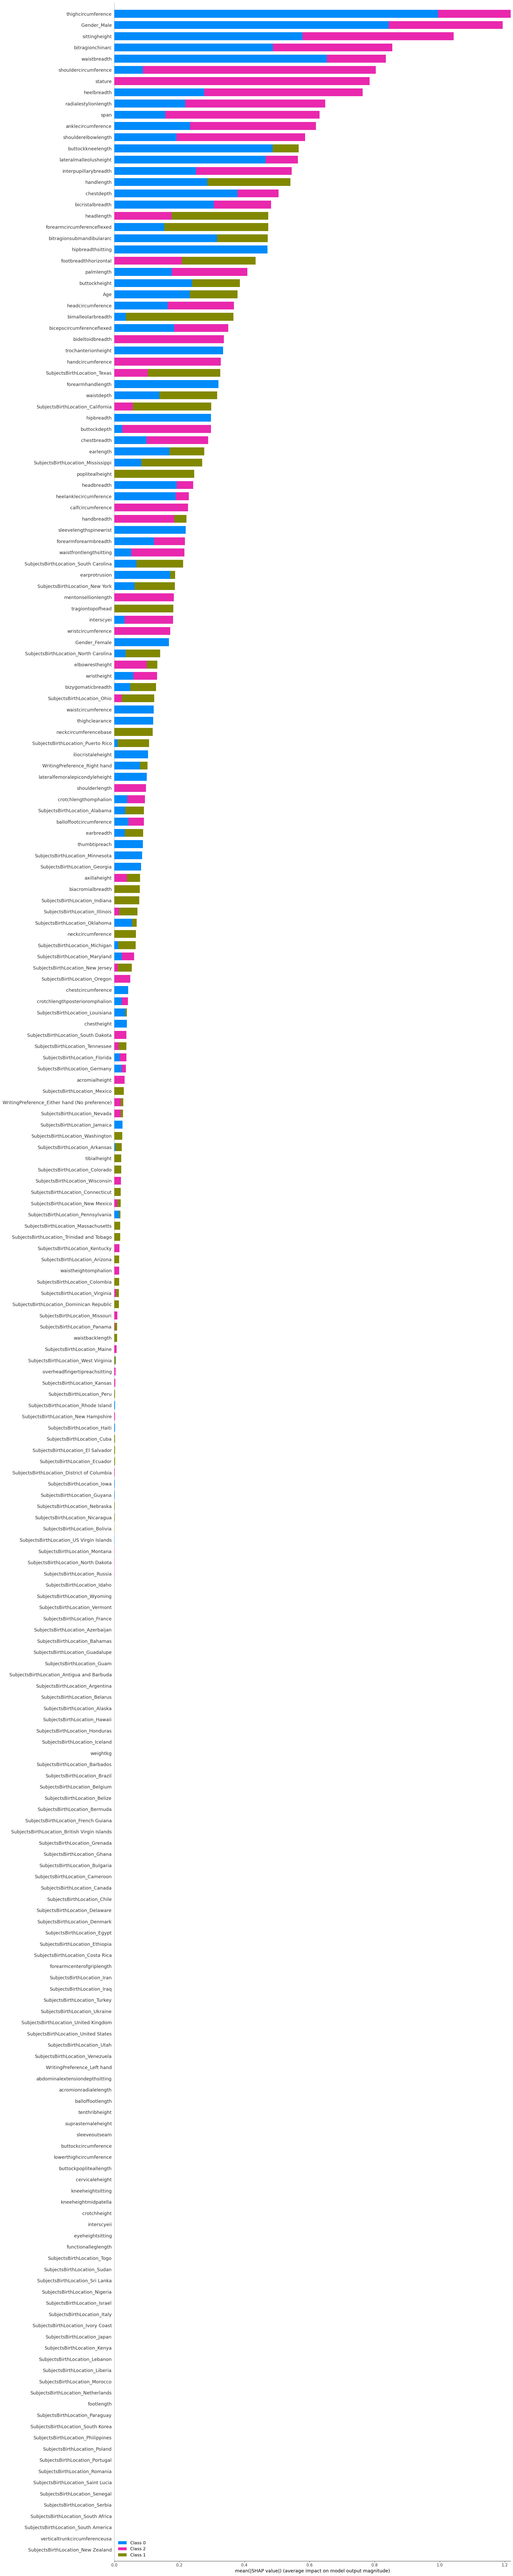

In [143]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans)  # LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)


## SHAP values for Feature Selection (train data)

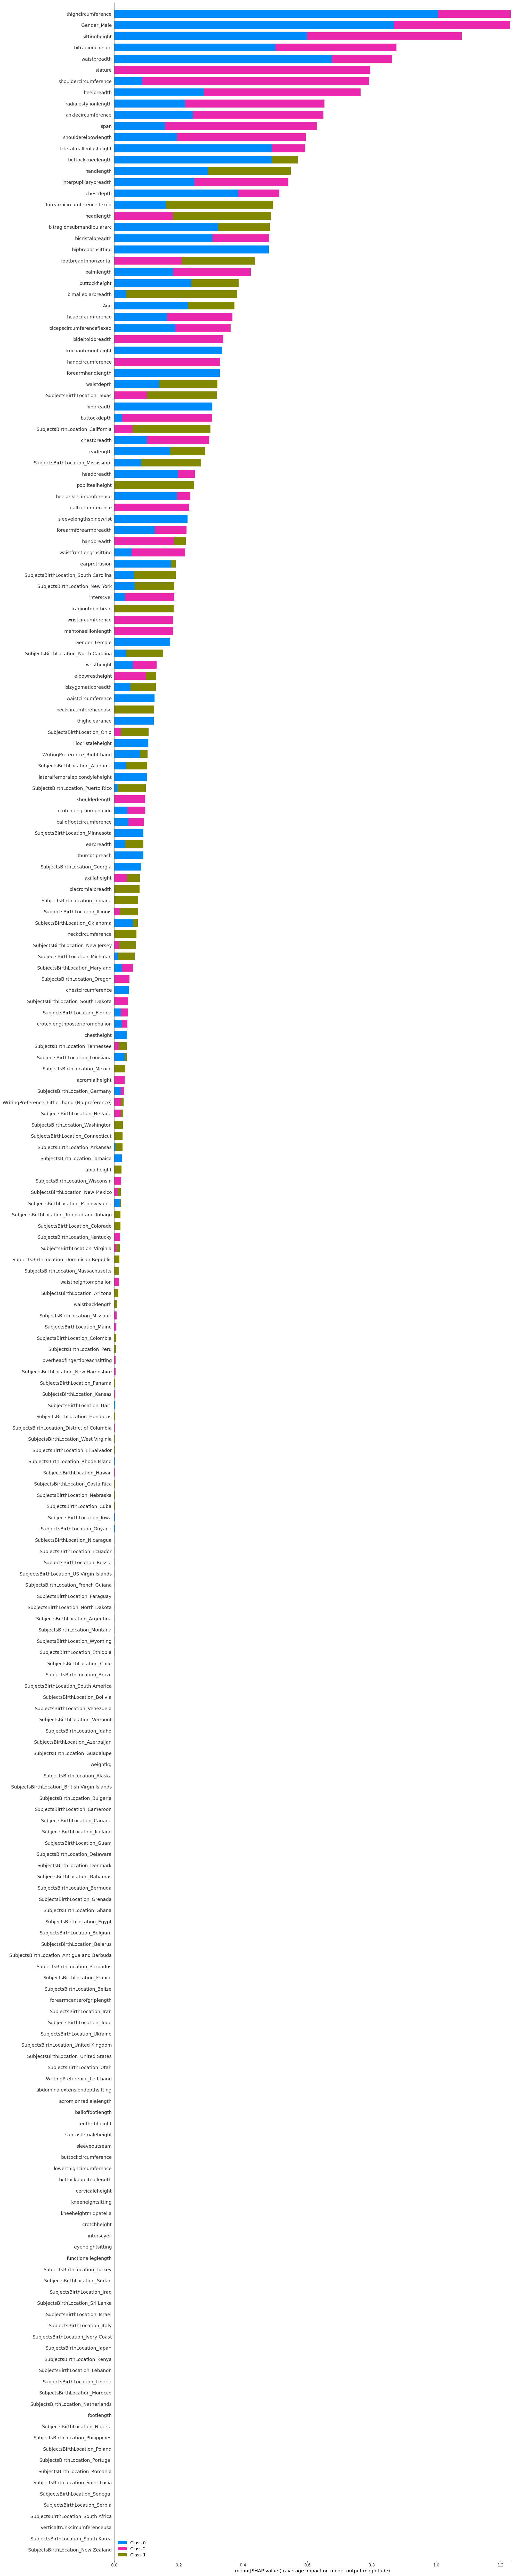

In [144]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)


In [145]:
hispanic = [
    "SubjectsBirthLocation",
    "handlength",
    "forearmcircumferenceflexed",
    "headlength",
    "bitragionsubmandibulararc",
    "footbreadthhorizontal",
    "bimalleolarbreadth",
    "poplitealheight",
    "waistdepth",
    "WritingPreference",
    "tragiontopofhead",
    "bideltoidbreadth",
    "neckcircumferencebase",
    "biacromialbreadth",
    "buttockheight",
    "buttockkneelength",
    "earlength",
    "axillaheight",
    "Age",
]

In [146]:
# X.columns

In [147]:
X2 = X[hispanic]
X2.head()

SubjectsBirthLocation  handlength  forearmcircumferenceflexed  headlength  bitragionsubmandibulararc  footbreadthhorizontal  bimalleolarbreadth  poplitealheight  waistdepth WritingPreference  tragiontopofhead  bideltoidbreadth  neckcircumferencebase  biacromialbreadth  buttockheight  buttockkneelength  earlength  axillaheight  Age
0          North Dakota         193                         299         206                        291                    101                  71              437         240        Right hand               140               493                    436                401            882                619         71          1347   41
1              New York         195                         289         201                        320                     98                  67              417         225         Left hand               120               479                    420                394            870                584         62          1293   35
2              New York         203                         357         202                        330                    103                  75              431         255         Left hand               125               544                    434                427            901                623         61          1327   42
3             Wisconsin         194                         318         199                        309                    106                  73              393         205        Right hand               127               518                    446                401            821                560         66          1239   31
4        North Carolina         218                         324         197                        310                    111                  80              523         214        Right hand               122               524                    430                435           1080                706         56          1478   21

In [148]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [149]:
X2.shape

(5769, 19)

In [150]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=101, stratify=y
)

In [151]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_new),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

operations_shap = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [152]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[215  15  30]
 [  8 108  20]
 [ 93 129 536]]
              precision    recall  f1-score   support

       Black       0.68      0.83      0.75       260
    Hispanic       0.43      0.79      0.56       136
       White       0.91      0.71      0.80       758

    accuracy                           0.74      1154
   macro avg       0.67      0.78      0.70      1154
weighted avg       0.80      0.74      0.76      1154


Train_Set
[[ 878   47  113]
 [  31  441   71]
 [ 366  512 2156]]
              precision    recall  f1-score   support

       Black       0.69      0.85      0.76      1038
    Hispanic       0.44      0.81      0.57       543
       White       0.92      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.79      0.71      4615
weighted avg       0.81      0.75      0.77      4615



In [153]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(
    model, X_train2, y_train2, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.421941
train_precision_Hispanic    0.443850
test_recall_Hispanic        0.762368
train_recall_Hispanic       0.812154
test_f1_Hispanic            0.542681
train_f1_Hispanic           0.573989
dtype: float64

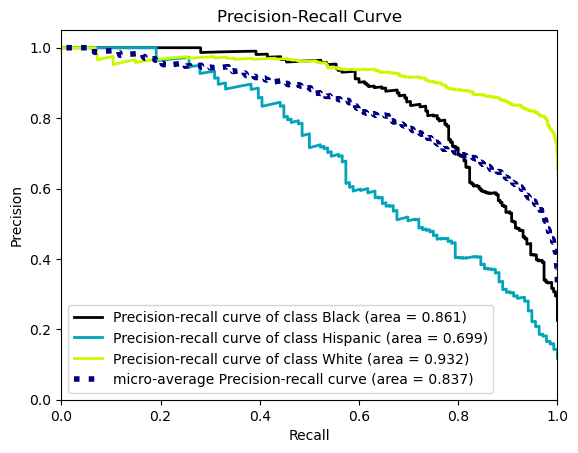

In [154]:
y_pred_proba = pipe_shap_model.predict_proba(X_test2)

plot_precision_recall(y_test2, y_pred_proba)
plt.show();

In [162]:
from sklearn.pipeline import make_pipeline
import pickle
best_model = LogisticRegression(C=1, 
                                class_weight='balanced', 
                                max_iter=1000,
                                random_state=101)

final_pipe = make_pipeline(column_trans, scaler, best_model)

final_pipe.fit(X, y) # fit the whole dataset

file = 'lr_trained_model.save'
pickle.dump(final_pipe, open(file, 'wb'))

AttributeError: 'numpy.ndarray' object has no attribute 'fit'

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>
